In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
seq1 = pd.read_csv('/content/drive/My Drive/Octave/SeqHub_Airline/Airline_combined_csv.csv')
seq1.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,DIV_AIRPORT_LANDINGS,Unnamed: 61
0,2018,4,12,6,4,2018-12-06,DL,19790,DL,N67171,2454,14908,1490803,32575,SNA,"Santa Ana, CA",CA,6,California,91,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,645,655.0,10.0,10.0,0.0,0.0,0600-0659,19.0,714.0,1334.0,5.0,1356,1339.0,-17.0,0.0,0.0,-2.0,1300-1359,0.0,0.0,251.0,224.0,200.0,1.0,1919.0,8,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2018,4,12,6,4,2018-12-06,DL,19790,DL,N327DN,2455,10423,1042302,30423,AUS,"Austin, TX",TX,48,Texas,74,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,700,656.0,-4.0,0.0,0.0,-1.0,0700-0759,12.0,708.0,945.0,6.0,1008,951.0,-17.0,0.0,0.0,-2.0,1000-1059,0.0,0.0,128.0,115.0,97.0,1.0,813.0,4,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2018,4,12,6,4,2018-12-06,DL,19790,DL,N327NW,2456,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,1133,1129.0,-4.0,0.0,0.0,-1.0,1100-1159,25.0,1154.0,1426.0,3.0,1449,1429.0,-20.0,0.0,0.0,-2.0,1400-1459,0.0,0.0,196.0,180.0,152.0,1.0,1069.0,5,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2018,4,12,6,4,2018-12-06,DL,19790,DL,N904DN,2457,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10529,1052906,30529,BDL,"Hartford, CT",CT,9,Connecticut,11,727,724.0,-3.0,0.0,0.0,-1.0,0700-0759,29.0,753.0,941.0,3.0,941,944.0,3.0,3.0,0.0,0.0,0900-0959,0.0,0.0,134.0,140.0,108.0,1.0,859.0,4,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2018,4,12,6,4,2018-12-06,DL,19790,DL,N904DN,2457,10529,1052906,30529,BDL,"Hartford, CT",CT,9,Connecticut,11,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1039,1034.0,-5.0,0.0,0.0,-1.0,1000-1059,8.0,1042.0,1254.0,6.0,1325,1300.0,-25.0,0.0,0.0,-2.0,1300-1359,0.0,0.0,166.0,146.0,132.0,1.0,859.0,4,NaN,NaN,NaN,NaN,NaN,0,NaN


In [0]:
seq1.shape

(7989942, 62)

In [0]:
seq1.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'AIR_TIME', 'FLIGHTS', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       

In [0]:
seq1[seq1.columns[1:]].corr()['TAXI_OUT'][:]

QUARTER                 -0.016248
MONTH                   -0.016074
DAY_OF_MONTH            -0.000932
DAY_OF_WEEK             -0.014844
OP_CARRIER_AIRLINE_ID    0.206000
OP_CARRIER_FL_NUM        0.084287
ORIGIN_AIRPORT_ID       -0.009935
ORIGIN_AIRPORT_SEQ_ID   -0.009934
ORIGIN_CITY_MARKET_ID   -0.053847
ORIGIN_STATE_FIPS        0.055182
ORIGIN_WAC              -0.075651
DEST_AIRPORT_ID          0.014485
DEST_AIRPORT_SEQ_ID      0.014485
DEST_CITY_MARKET_ID      0.033912
DEST_STATE_FIPS          0.026319
DEST_WAC                -0.035821
CRS_DEP_TIME             0.002713
DEP_TIME                 0.012930
DEP_DELAY                0.063612
DEP_DELAY_NEW            0.062479
DEP_DEL15                0.072394
DEP_DELAY_GROUP          0.077176
TAXI_OUT                 1.000000
WHEELS_OFF               0.039882
WHEELS_ON                0.030273
TAXI_IN                  0.022186
CRS_ARR_TIME             0.025916
ARR_TIME                 0.026902
ARR_DELAY                0.219324
ARR_DELAY_NEW 

#Dropping bad features and implementing 4 hour constraint

In [0]:
seq1.drop(axis=1,columns=['FLIGHTS','CARRIER_DELAY','SECURITY_DELAY','LATE_AIRCRAFT_DELAY','Unnamed: 61',
                          'DEP_TIME','DEP_DELAY','DEP_DELAY_NEW','DEP_DEL15','DEP_DELAY_GROUP'],inplace=True)

In [0]:
seq1.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DISTANCE_GROUP', 'WEATHER_DELAY', 'NAS_DELAY', 'DIV_AIRPORT_LANDINGS'],
      dtype='object')

#Creating Proposed prediction time column

In [0]:
airports_codes = pd.read_csv('/content/drive/My Drive/Octave/SeqHub_Airline/ICAO_IATA_AIRPORTS.csv')

airports_codes.head()

,City,FAA,IATA,ICAO,Airport,Role,Enplanements,Unnamed: 7
0,Birmingham,BHM,BHM,KBHM,Birmingham–Shuttlesworth International Airport,P-S,"1,304,467",NaN
1,Dothan,DHN,DHN,KDHN,Dothan Regional Airport,P-N,"49,411",NaN
2,Huntsville,HSV,HSV,KHSV,Huntsville International Airport (Carl T. Jone...,P-S,"527,801",NaN
3,Mobile,MOB,MOB,KMOB,Mobile Regional Airport,P-N,"288,209",NaN
4,Montgomery,MGM,MGM,KMGM,Montgomery Regional Airport (Dannelly Field),P-N,"173,210",NaN


In [0]:
seq1['TAXI_OUT'].describe()

count    7.848747e+06
mean     1.740750e+01
std      9.944085e+00
min      1.000000e+00
25%      1.100000e+01
50%      1.500000e+01
75%      2.000000e+01
max      2.270000e+02
Name: TAXI_OUT, dtype: float64

In [0]:
seq1['TAXI_OUT'] = seq1['TAXI_OUT'].fillna(0)

In [0]:
seq1.TAXI_OUT = seq1.TAXI_OUT.astype(int)

In [0]:
taxi_list = seq1['TAXI_OUT'].tolist()

In [0]:
newlist = []
for item in taxi_list:
    if item >= 18:
        item = 1
    else:
      item = 0

    newlist.append(item)
    

In [0]:
seq1['incident_category'] = newlist

In [0]:
seq1['incident_category'].head()

0    1
1    0
2    1
3    1
4    0
Name: incident_category, dtype: int64

In [0]:
seq1['incident_category'].unique()

array([1, 0])

In [0]:
airports_codes.shape

(379, 8)

In [0]:
seq_new = pd.merge(seq1, airports_codes, left_on='ORIGIN', right_on='IATA', how='left')
seq_new.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,WEATHER_DELAY,NAS_DELAY,DIV_AIRPORT_LANDINGS,incident_category,City,FAA,IATA,ICAO,Airport,Role,Enplanements,Unnamed: 7
0,2018,4,12,6,4,2018-12-06,DL,19790,DL,N67171,2454,14908,1490803,32575,SNA,"Santa Ana, CA",CA,6,California,91,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,645,0600-0659,19,714.0,1334.0,5.0,1356,1339.0,-17.0,0.0,0.0,-2.0,1300-1359,0.0,0.0,251.0,224.0,200.0,1919.0,8,NaN,NaN,0,1,Orange County,SNA,SNA,KSNA,John Wayne Airport (was Orange County Airport),P-M,"5,217,242",NaN
1,2018,4,12,6,4,2018-12-06,DL,19790,DL,N327DN,2455,10423,1042302,30423,AUS,"Austin, TX",TX,48,Texas,74,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,700,0700-0759,12,708.0,945.0,6.0,1008,951.0,-17.0,0.0,0.0,-2.0,1000-1059,0.0,0.0,128.0,115.0,97.0,813.0,4,NaN,NaN,0,0,Austin,AUS,AUS,KAUS,Austin-Bergstrom International Airport,P-M,"6,095,545",NaN
2,2018,4,12,6,4,2018-12-06,DL,19790,DL,N327NW,2456,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,1133,1100-1159,25,1154.0,1426.0,3.0,1449,1429.0,-20.0,0.0,0.0,-2.0,1400-1459,0.0,0.0,196.0,180.0,152.0,1069.0,5,NaN,NaN,0,1,New York,JFK,JFK,KJFK,John F. Kennedy International Airport (was New...,P-L,"29,533,154",NaN
3,2018,4,12,6,4,2018-12-06,DL,19790,DL,N904DN,2457,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,10529,1052906,30529,BDL,"Hartford, CT",CT,9,Connecticut,11,727,0700-0759,29,753.0,941.0,3.0,941,944.0,3.0,3.0,0.0,0.0,0900-0959,0.0,0.0,134.0,140.0,108.0,859.0,4,NaN,NaN,0,1,Atlanta,ATL,ATL,KATL,Hartsfield–Jackson Atlanta International Airport,P-L,"50,501,858",NaN
4,2018,4,12,6,4,2018-12-06,DL,19790,DL,N904DN,2457,10529,1052906,30529,BDL,"Hartford, CT",CT,9,Connecticut,11,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1039,1000-1059,8,1042.0,1254.0,6.0,1325,1300.0,-25.0,0.0,0.0,-2.0,1300-1359,0.0,0.0,166.0,146.0,132.0,859.0,4,NaN,NaN,0,0,Hartford,BDL,BDL,KBDL,Bradley International Airport,P-M,"2,982,194",NaN


In [0]:
seq_new.shape

(7989942, 56)

In [0]:
seq_new['FL_DATE'] = pd.to_datetime(seq_new['FL_DATE'])

In [0]:
seq_new['CRS_DEP_TIME'].head()

0     645
1     700
2    1133
3     727
4    1039
Name: CRS_DEP_TIME, dtype: int64

In [0]:
t1 = seq_new['CRS_DEP_TIME'].astype(str).str.zfill(6)
seq_new['CRS_DEP_TIME'] =t1.str[2:4] + ':' + t1.str[4:6] + ':' + t1.str[0:2]

In [0]:
seq_new['CRS_DEP_TIME'].head()

0    06:45:00
1    07:00:00
2    11:33:00
3    07:27:00
4    10:39:00
Name: CRS_DEP_TIME, dtype: object

In [0]:
seq_new['CRS_DEP_TIME'] = pd.to_datetime(seq_new['CRS_DEP_TIME'])

In [0]:
seq_new['CRS_DEP_TIME'].head()

0   2020-02-11 06:45:00
1   2020-02-11 07:00:00
2   2020-02-11 11:33:00
3   2020-02-11 07:27:00
4   2020-02-11 10:39:00
Name: CRS_DEP_TIME, dtype: datetime64[ns]

In [0]:
from datetime import datetime , timedelta

In [0]:
seq_new['proposed_pred_time'] = seq_new['CRS_DEP_TIME'] - timedelta(hours=4, minutes=0)

In [0]:
seq_new['proposed_pred_time'].head()

0   2020-02-11 02:45:00
1   2020-02-11 03:00:00
2   2020-02-11 07:33:00
3   2020-02-11 03:27:00
4   2020-02-11 06:39:00
Name: proposed_pred_time, dtype: datetime64[ns]

In [0]:
seq_new['proposed_pred_time'] = seq_new['proposed_pred_time'].dt.round('H')

In [0]:
seq_new['proposed_pred_time'].head()

0   2020-02-11 03:00:00
1   2020-02-11 03:00:00
2   2020-02-11 08:00:00
3   2020-02-11 03:00:00
4   2020-02-11 07:00:00
Name: proposed_pred_time, dtype: datetime64[ns]

In [0]:
seq_new['proposed_pred_time'] = pd.Series([val.time() for val in seq_new['proposed_pred_time']])

In [0]:
seq_new['proposed_pred_time'].head()

0    03:00:00
1    03:00:00
2    08:00:00
3    03:00:00
4    07:00:00
Name: proposed_pred_time, dtype: object

In [0]:
seq_new['FL_DATE'] = seq_new['FL_DATE'].dt.date

In [0]:
seq_new['dts'] = seq_new['FL_DATE'].map(str)  + " " + seq_new['proposed_pred_time'].map(str)

In [0]:
seq_new['dts'].head()

0    2018-12-06 03:00:00
1    2018-12-06 03:00:00
2    2018-12-06 08:00:00
3    2018-12-06 03:00:00
4    2018-12-06 07:00:00
Name: dts, dtype: object

In [0]:
seq_new['dts'] = pd.to_datetime(seq_new['dts'])

In [0]:
seq_new['dts'].head()

0   2018-12-06 03:00:00
1   2018-12-06 03:00:00
2   2018-12-06 08:00:00
3   2018-12-06 03:00:00
4   2018-12-06 07:00:00
Name: dts, dtype: datetime64[ns]

In [0]:
seq_new.shape

(7989942, 73)

In [0]:
seq_new['icao_x_dts'] = seq_new['ICAO'].map(str)  + "x" + seq_new['dts'].map(str)

In [0]:
seq_new['icao_x_dts'].head()

0    KSNAx2018-12-06 03:00:00
1    KAUSx2018-12-06 03:00:00
2    KJFKx2018-12-06 08:00:00
3    KATLx2018-12-06 03:00:00
4    KBDLx2018-12-06 07:00:00
Name: icao_x_dts, dtype: object

In [0]:
seq_new['icao_x_dts'].tail()

7989937    KBURx2019-09-19 07:00:00
7989938    KBURx2019-09-19 05:00:00
7989939    KBURx2019-09-19 17:00:00
7989940    KBURx2019-09-19 12:00:00
7989941    KBURx2019-09-19 17:00:00
Name: icao_x_dts, dtype: object

In [0]:
seq_new[seq_new.columns[1:]].corr()['TAXI_OUT'][:]

QUARTER                 -0.005338
MONTH                   -0.005135
DAY_OF_MONTH            -0.003316
DAY_OF_WEEK             -0.013921
OP_CARRIER_AIRLINE_ID    0.195813
OP_CARRIER_FL_NUM        0.073864
ORIGIN_STATE_FIPS        0.050811
DEST_AIRPORT_ID          0.014631
DEST_AIRPORT_SEQ_ID      0.014631
DEST_CITY_MARKET_ID      0.035205
DEST_STATE_FIPS          0.022894
TAXI_OUT                 1.000000
WHEELS_OFF               0.039882
WHEELS_ON                0.030273
TAXI_IN                  0.022186
CRS_ARR_TIME             0.022270
ARR_TIME                 0.026902
ARR_DELAY                0.219324
ARR_DELAY_NEW            0.179659
ARR_DEL15                0.283684
ARR_DELAY_GROUP          0.279611
CANCELLED               -0.225438
DIVERTED                 0.015980
CRS_ELAPSED_TIME         0.086239
ACTUAL_ELAPSED_TIME      0.191964
AIR_TIME                 0.054908
DISTANCE                 0.044462
DISTANCE_GROUP           0.043041
WEATHER_DELAY            0.027046
NAS_DELAY     

In [0]:
seq_new.drop(axis=1, inplace=True,columns=['WEATHER_DELAY','NAS_DELAY',])

NameError: ignored

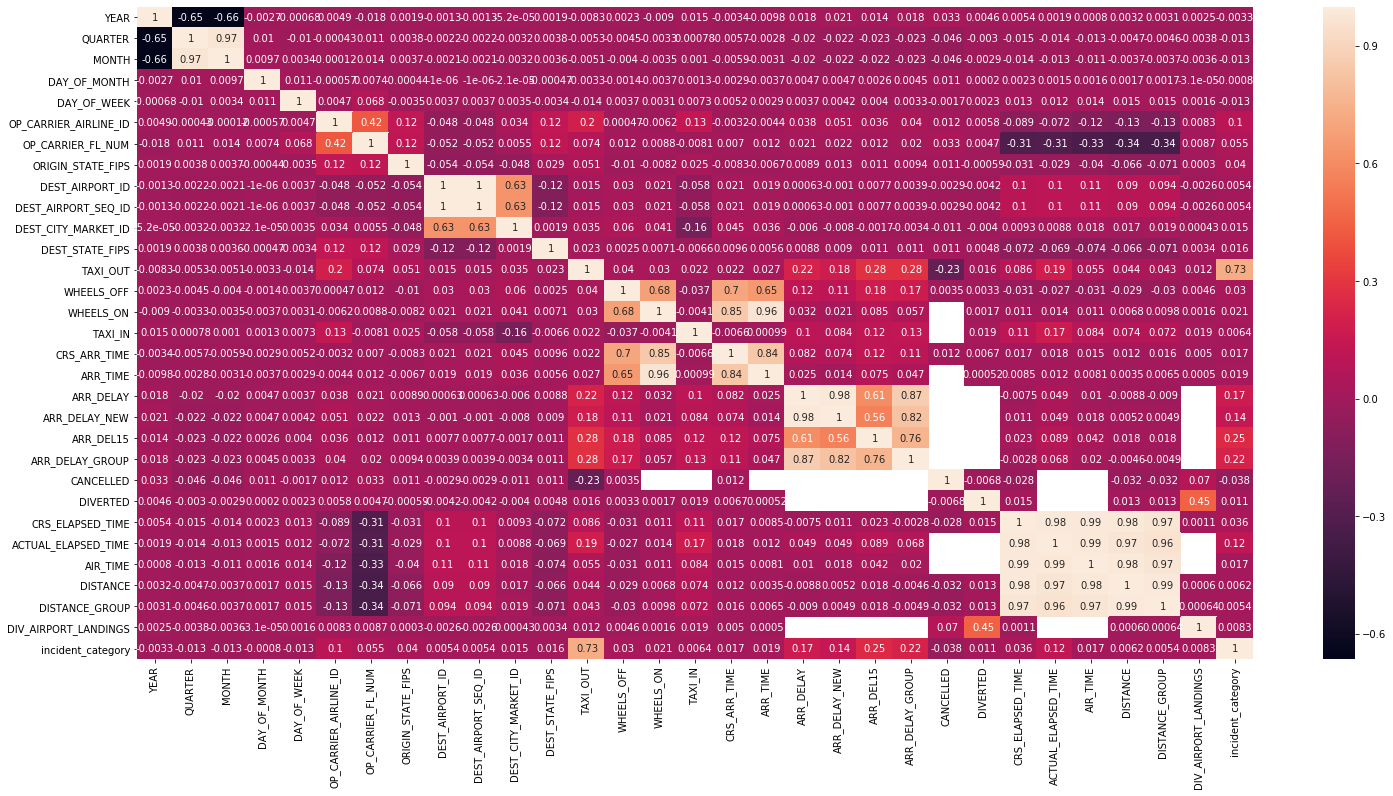

In [0]:
plt.figure(figsize=(25,12))
sns.heatmap(seq_new.corr(), annot=True)

#Adding Weather Data

In [0]:
nov_18 = pd.read_csv('/content/drive/My Drive/Octave/SeqHub_Airline/nov_18.csv',parse_dates=['Date'])
nov_18.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,6,7,8,9,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Weather_Type,ICAO,Zulu Time,Wind Drection,Prevailing Visisbility,Cloud coverage (Oktas),Broken Cloud layer,Altimeter,Barometric Pressure,Temp/Dew point,Date,Time
0,METAR,KBHM,312353Z,15006KT,10SM,FEW050,BKN250,A2999,SLP151,T02330167,2018-10-31,11:53:00 PM
1,METAR,KBHM,312253Z,15004KT,10SM,SCT050,BKN250,A2999,SLP150,T02440156,2018-10-31,10:53:00 PM
2,METAR,KBHM,312153Z,17011KT,10SM,FEW045,BKN250,A3001,SLP154,T02560150,2018-10-31,9:53:00 PM
3,METAR,KBHM,312053Z,18011KT,10SM,SCT046,BKN250,A3001,SLP156,T02720150,2018-10-31,8:53:00 PM
4,METAR,KBHM,311953Z,16009KT,10SM,SCT045,BKN250,A3002,SLP160,T02720161,2018-10-31,7:53:00 PM


In [0]:
oct_19 = pd.read_csv('/content/drive/My Drive/Octave/SeqHub_Airline/oct_19.csv',parse_dates=['DATE'],)
oct_19.head

<bound method NDFrame.head of            Weather_type ICAO CODES  ...       DATE         TIME
0                 METAR       KBHM  ... 2019-10-31  11:53:00 PM
1                 METAR       KBHM  ... 2019-10-31  10:53:00 PM
2                 METAR       KBHM  ... 2019-10-31   9:53:00 PM
3                 METAR       KBHM  ... 2019-10-31   8:53:00 PM
4                 METAR       KBHM  ... 2019-10-31   7:53:00 PM
...                 ...        ...  ...        ...          ...
15703             METAR       PAKN  ... 2019-10-15   5:54:00 AM
15704             METAR       PAKN  ... 2019-10-15   4:54:00 AM
15705             METAR       PAKN  ... 2019-10-15   3:54:00 AM
15706             METAR       PAKN  ... 2019-10-15   2:54:00 AM
15707  METAR   07/01          PAKN  ...        NaT          NaN

[15708 rows x 12 columns]>

In [0]:
apr_19 = pd.read_csv('/content/drive/My Drive/Octave/SeqHub_Airline/april_19.csv',parse_dates=['Date'])
apr_19.head()

,Weather_Type,ICAO,Zulu Time,Wind Drection,Prevailing Visisbility,Cloud coverage (Oktas),Broken Cloud layer,Altimeter,Barometric Pressure,Temp/Dew point,Date,Time
0,METAR,KBHM,302353Z,14006KT,10SM,FEW060,BKN250,A3014,SLP198,T02670161,2019-04-30,11:53:00 PM
1,METAR,KBHM,302253Z,13008KT,10SM,FEW055,BKN250,A3015,SLP203,T02780161,2019-04-30,10:53:00 PM
2,METAR,KBHM,302153Z,14007KT,10SM,FEW055,BKN250,A3016,SLP206,T02830167,2019-04-30,9:53:00 PM
3,METAR,KBHM,302053Z,17008KT,10SM,FEW055,BKN250,A3017,SLP210,T02780156,2019-04-30,8:53:00 PM
4,METAR,KBHM,301953Z,20006KT,10SM,FEW050,BKN250,A3019,SLP217,T02830156,2019-04-30,7:53:00 PM


In [0]:
may_19 = pd.read_csv('/content/drive/My Drive/Octave/SeqHub_Airline/may_19.csv',parse_dates=['DATE'])
may_19.head()

,Weather_type,ICAO CODES,ZULU TIME,WIND DIRECTION,PREVAILING VISIBILITY,CLOUD COVERAGE(Oktas),BROKEN CLOUD LAYER,ALTIMETER,BAROMETRIC PRESSURE,TEMP/DEW POINT,DATE,TIME
0,METAR,KBHM,312353Z,32006KT,10SM,FEW250,NaN,A2993,SLP126,T02890139,2019-05-31,11:53:00 PM
1,METAR,KBHM,312253Z,30008KT,10SM,FEW070,NaN,A2992,SLP123,T03000133,2019-05-31,10:53:00 PM
2,METAR,KBHM,312153Z,29009KT,10SM,SCT070,NaN,A2993,SLP126,T03060133,2019-05-31,9:53:00 PM
3,METAR,KBHM,312053Z,29009G16KT,10SM,SCT070,NaN,A2994,SLP128,T03170128,2019-05-31,8:53:00 PM
4,METAR,KBHM,311953Z,28012G20KT,10SM,SCT060,NaN,A2995,SLP134,T03170139,2019-05-31,7:53:00 PM


In [0]:
nov_18.shape

(1048574, 12)

In [0]:
apr_19.shape

(32647, 12)

In [0]:
may_19.shape

(4022, 12)

In [0]:
oct_19.shape

(15708, 12)

In [0]:
nov_18['Time']= pd.to_datetime(nov_18['Time'])
nov_18['Time'] = nov_18['Time'].dt.round('H')

In [0]:
apr_19['Time']= pd.to_datetime(apr_19['Time'])
apr_19['Time'] = apr_19['Time'].dt.round('H')

In [0]:
may_19['TIME']= pd.to_datetime(may_19['TIME'])
may_19['TIME'] = may_19['TIME'].dt.round('H')

In [0]:
oct_19['TIME']= pd.to_datetime(oct_19['TIME'])
oct_19['TIME'] = oct_19['TIME'].dt.round('H')

In [0]:
oct_19['TIME'].head()

0   2020-02-06 00:00:00
1   2020-02-05 23:00:00
2   2020-02-05 22:00:00
3   2020-02-05 21:00:00
4   2020-02-05 20:00:00
Name: TIME, dtype: datetime64[ns]

In [0]:
nov_18['Time'].shape

(1048574,)

In [0]:
nov_18['Time'].value_counts()

2020-01-30 08:00:00    1300
2020-01-30 11:00:00    1298
2020-01-30 10:00:00    1293
2020-01-30 09:00:00    1289
2020-01-30 07:00:00    1278
2020-01-30 12:00:00    1271
2020-01-30 06:00:00    1243
2020-01-30 15:00:00    1241
2020-01-30 14:00:00    1239
2020-01-30 02:00:00    1239
2020-01-30 13:00:00    1238
2020-01-30 03:00:00    1231
2020-01-30 05:00:00    1230
2020-01-30 01:00:00    1229
2020-01-30 04:00:00    1225
2020-01-30 16:00:00    1221
2020-01-30 23:00:00    1220
2020-01-30 19:00:00    1219
2020-01-30 17:00:00    1216
2020-01-30 18:00:00    1215
2020-01-30 20:00:00    1213
2020-01-30 21:00:00    1206
2020-01-30 22:00:00    1199
2020-01-31 00:00:00    1176
2020-01-30 00:00:00      39
Name: Time, dtype: int64

In [0]:
nov_18.drop(axis=1,inplace=True,columns=['Altimeter','Broken Cloud layer'])

In [0]:
nov_18.dropna(axis=0,inplace=True)

In [0]:
nov_18['Time'] = pd.Series([val.time() for val in nov_18['Time']])

In [0]:
nov_18['Time'].head()

0    00:00:00
1    23:00:00
2    22:00:00
3    21:00:00
4    20:00:00
Name: Time, dtype: object

In [0]:
nov_18['Time'].tail()

29763    NaN
29764    NaN
29765    NaN
29766    NaN
29767    NaN
Name: Time, dtype: object

In [0]:
apr_19.drop(axis=1,inplace=True,columns=['Broken Cloud layer','Barometric Pressure'])

In [0]:
apr_19.dropna(axis=0,inplace=True)

In [0]:
apr_19['Time'] = pd.Series([val.time() for val in apr_19['Time']])

In [0]:
apr_19['Time'].head()

0    00:00:00
1    23:00:00
2    22:00:00
3    21:00:00
4    20:00:00
Name: Time, dtype: object

In [0]:
apr_19['Time'].tail()

32640    NaN
32641    NaN
32642    NaN
32643    NaN
32644    NaN
Name: Time, dtype: object

In [0]:
may_19['TIME'].head()

0   2020-02-01 00:00:00
1   2020-01-31 23:00:00
2   2020-01-31 22:00:00
3   2020-01-31 21:00:00
4   2020-01-31 20:00:00
Name: TIME, dtype: datetime64[ns]

In [0]:
may_19['TIME'].tail()

4017   NaT
4018   NaT
4019   NaT
4020   NaT
4021   NaT
Name: TIME, dtype: datetime64[ns]

In [0]:
may_19.drop(axis=1,inplace=True,columns=['BROKEN CLOUD LAYER','CLOUD COVERAGE(Oktas)'])

In [0]:
may_19.dropna(inplace=True)

In [0]:
may_19['TIME'] = pd.Series([val.time() for val in may_19['TIME']])

In [0]:
may_19['TIME'].head()

0    00:00:00
1    23:00:00
2    22:00:00
3    21:00:00
4    20:00:00
Name: TIME, dtype: object

In [0]:
may_19['TIME'].tail()

3980    NaN
3981    NaN
3982    NaN
3983    NaN
3984    NaN
Name: TIME, dtype: object

In [0]:
oct_19['TIME'].tail()

15703   2020-01-31 06:00:00
15704   2020-01-31 05:00:00
15705   2020-01-31 04:00:00
15706   2020-01-31 03:00:00
15707                   NaT
Name: TIME, dtype: datetime64[ns]

In [0]:
oct_19.drop(axis=1,inplace=True,columns=['BROKEN CLOUD LAYER','ALTIMETER'])

In [0]:
oct_19.dropna(inplace=True)

In [0]:
oct_19['TIME'] = pd.Series([val.time() for val in oct_19['TIME']])

In [0]:
oct_19['TIME'].tail()

15700    NaN
15701    NaN
15702    NaN
15703    NaN
15704    NaN
Name: TIME, dtype: object

In [0]:
oct_19['TIME'].head()

0    00:00:00
1    23:00:00
2    22:00:00
3    21:00:00
4    20:00:00
Name: TIME, dtype: object

In [0]:
nov_18.columns

Index(['Weather_Type', 'ICAO', 'Zulu Time', 'Wind Drection',
       'Prevailing Visisbility', 'Cloud coverage (Oktas)',
       'Barometric Pressure', 'Temp/Dew point', 'Date', 'Time'],
      dtype='object')

In [0]:
nov_18['Date'] = nov_18['Date'].dt.date

In [0]:
apr_19.columns

Index(['Weather_Type', 'ICAO', 'Zulu Time', 'Wind Drection',
       'Prevailing Visisbility', 'Cloud coverage (Oktas)', 'Altimeter',
       'Temp/Dew point', 'Date', 'Time'],
      dtype='object')

In [0]:
apr_19['Date'] = apr_19['Date'].dt.date

In [0]:
may_19.columns

Index(['Weather_type', 'ICAO CODES', 'ZULU TIME', 'WIND DIRECTION',
       'PREVAILING VISIBILITY', 'ALTIMETER', 'BAROMETRIC PRESSURE',
       'TEMP/DEW POINT', 'DATE', 'TIME'],
      dtype='object')

In [0]:
may_19['DATE'] = may_19['DATE'].dt.date

In [0]:
oct_19.columns

Index(['Weather_type', 'ICAO CODES', 'ZULU TIME', 'WIND DIRECTION',
       'PREVAILING VISIBILITY', 'CLOUD COVERAGE', 'BAROMETRIC PRESSURE',
       'TEMP/DEW POINT', 'DATE', 'TIME'],
      dtype='object')

In [0]:
oct_19['DATE'] = oct_19['DATE'].dt.date

In [0]:
nov_18.dropna(inplace=True)

In [0]:
nov_18['dts'] = nov_18['Date'].map(str)  + " " + nov_18['Time'].map(str)

In [0]:
nov_18['dts'].tail()

22264    2018-10-14 15:00:00
22265    2018-10-14 14:00:00
22266    2018-10-14 13:00:00
22267    2018-10-13 12:00:00
22268    2018-10-13 11:00:00
Name: dts, dtype: object

In [0]:
nov_18['dts'] = pd.to_datetime(nov_18['dts'])

In [0]:
nov_18.columns

Index(['Weather_Type', 'ICAO', 'Zulu Time', 'Wind Drection',
       'Prevailing Visisbility', 'Cloud coverage (Oktas)',
       'Barometric Pressure', 'Temp/Dew point', 'Date', 'Time', 'dts'],
      dtype='object')

In [0]:
nov_18['icao_x_dts'] = nov_18['ICAO'].map(str)  + "x" + nov_18['dts'].map(str)

In [0]:
nov_18['icao_x_dts'].tail()

22264    PAVDx2018-10-14 15:00:00
22265    PAVDx2018-10-14 14:00:00
22266    PAVDx2018-10-14 13:00:00
22267    PAVDx2018-10-13 12:00:00
22268    PAVDx2018-10-13 11:00:00
Name: icao_x_dts, dtype: object

In [0]:
apr_19.dropna(inplace=True)

In [0]:
apr_19.columns

Index(['Weather_Type', 'ICAO', 'Zulu Time', 'Wind Drection',
       'Prevailing Visisbility', 'Cloud coverage (Oktas)', 'Altimeter',
       'Temp/Dew point', 'Date', 'Time', 'dts'],
      dtype='object')

In [0]:
apr_19['dts'] = apr_19['Date'].map(str)  + " " + apr_19['Time'].map(str)
apr_19['dts'] = pd.to_datetime(apr_19['dts'])
apr_19['icao_x_dts'] = apr_19['ICAO'].map(str)  + "x" + apr_19['dts'].map(str)

In [0]:
apr_19['icao_x_dts'].tail()

In [0]:
may_19.columns

Index(['Weather_type', 'ICAO CODES', 'ZULU TIME', 'WIND DIRECTION',
       'PREVAILING VISIBILITY', 'ALTIMETER', 'BAROMETRIC PRESSURE',
       'TEMP/DEW POINT', 'DATE', 'TIME'],
      dtype='object')

In [0]:
may_19.dropna(inplace=True)

In [0]:
may_19['dts'] = may_19['DATE'].map(str)  + " " + may_19['TIME'].map(str)
may_19['dts'] = pd.to_datetime(may_19['dts'])
may_19['icao_x_dts'] = may_19['ICAO CODES'].map(str)  + "x" + may_19['dts'].map(str)

In [0]:
may_19['icao_x_dts'].tail()

3019    KMGMx2019-05-30 07:00:00
3025    KMGMx2019-05-29 01:00:00
3026    KMGMx2019-05-29 00:00:00
3027    KMGMx2019-05-29 23:00:00
3028    KMGMx2019-05-29 22:00:00
Name: icao_x_dts, dtype: object

In [0]:
oct_19.columns

Index(['Weather_type', 'ICAO CODES', 'ZULU TIME', 'WIND DIRECTION',
       'PREVAILING VISIBILITY', 'CLOUD COVERAGE', 'BAROMETRIC PRESSURE',
       'TEMP/DEW POINT', 'DATE', 'TIME'],
      dtype='object')

In [0]:
oct_19.dropna(inplace=True)

In [0]:
oct_19['dts'] = oct_19['DATE'].map(str)  + " " + oct_19['TIME'].map(str)
oct_19['dts'] = pd.to_datetime(oct_19['dts'])
oct_19['icao_x_dts'] = oct_19['ICAO CODES'].map(str)  + "x" + oct_19['dts'].map(str)

In [0]:
oct_19['icao_x_dts'].tail()

11018    PAFAx2019-10-07 09:00:00
11019    PAFAx2019-10-07 08:00:00
11020    PAFAx2019-10-07 07:00:00
11021    PAFAx2019-10-07 06:00:00
11022    PAFAx2019-10-07 05:00:00
Name: icao_x_dts, dtype: object

In [0]:
train = pd.merge(seq_new, nov_18, left_on='icao_x_dts', right_on='icao_x_dts', how='left') # Airline_data_and_November

In [0]:
train.shape

(7990141, 73)

In [0]:
train.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DISTANCE_GROUP', 'DIV_AIRPORT_LANDINGS', 'incident_category', 'City',
       'FAA', 'IATA', 'ICAO_x', 'Airport', 'Role', 'Enplanement

In [0]:
train = pd.merge(seq_new, apr_19, left_on='icao_x_dts', right_on='icao_x_dts', how='left') # Airline_data_and_april2019

In [0]:
train = pd.merge(seq_new, may_19, left_on='icao_x_dts', right_on='icao_x_dts', how='left') # Airline_data_and_may2019

In [0]:
train = pd.merge(seq_new, oct_19, left_on='icao_x_dts', right_on='icao_x_dts', how='left') # Airline_data_and_october2019

In [0]:
train.shape

(7990335, 73)

In [0]:
train[train.columns[1:]].corr()['TAXI_OUT'][:]

QUARTER                 -0.005355
MONTH                   -0.005148
DAY_OF_MONTH            -0.003312
DAY_OF_WEEK             -0.013925
OP_CARRIER_AIRLINE_ID    0.195809
OP_CARRIER_FL_NUM        0.073870
ORIGIN_STATE_FIPS        0.050829
DEST_AIRPORT_ID          0.014624
DEST_AIRPORT_SEQ_ID      0.014624
DEST_CITY_MARKET_ID      0.035209
DEST_STATE_FIPS          0.022889
TAXI_OUT                 1.000000
WHEELS_OFF               0.039888
WHEELS_ON                0.030280
TAXI_IN                  0.022184
CRS_ARR_TIME             0.022277
ARR_TIME                 0.026909
ARR_DELAY                0.219325
ARR_DELAY_NEW            0.179659
ARR_DEL15                0.283682
ARR_DELAY_GROUP          0.279610
CANCELLED               -0.225435
DIVERTED                 0.015985
CRS_ELAPSED_TIME         0.086233
ACTUAL_ELAPSED_TIME      0.191958
AIR_TIME                 0.054902
DISTANCE                 0.044454
DISTANCE_GROUP           0.043033
DIV_AIRPORT_LANDINGS     0.011997
incident_categ

In [0]:
train['zulu_time_value'] = train['ZULU TIME'].str.replace(r'[^\d.]+', '')


In [0]:
train['zulu_time_value'].fillna(0)

0          0
1          0
2          0
3          0
4          0
          ..
7990330    0
7990331    0
7990332    0
7990333    0
7990334    0
Name: zulu_time_value, Length: 7990335, dtype: object

In [0]:
train['zulu_time_value'] = train['zulu_time_value'].astype(float)

In [0]:
#train['zulu_time_value'] = train['ZULU TIME'].str.extract('(\d+)', expand=False)

In [0]:
train['wind_direction_value'] = train['WIND DIRECTION'].str.replace(r'[^\d.]+', '')

In [0]:
train['wind_direction_value'].fillna(0)

0          0
1          0
2          0
3          0
4          0
          ..
7990330    0
7990331    0
7990332    0
7990333    0
7990334    0
Name: wind_direction_value, Length: 7990335, dtype: object

In [0]:
train['wind_direction_value'] = train['wind_direction_value'].astype(float)

In [0]:
train['prevailing_visibility_value'] = train['PREVAILING VISIBILITY'].str.replace(r'[^\d.]+', '')

In [0]:
train['prevailing_visibility_value'].fillna(0)

0          0
1          0
2          0
3          0
4          0
          ..
7990330    0
7990331    0
7990332    0
7990333    0
7990334    0
Name: prevailing_visibility_value, Length: 7990335, dtype: object

In [0]:
train['prevailing_visibility_value'] = train['prevailing_visibility_value'].str.extract('(\d+)', expand=False)

In [0]:
train['prevailing_visibility_value'] = train['prevailing_visibility_value'].astype(float)

In [0]:
train['prevailing_visibility_value'].unique()

array([nan, 10.,  9.,  7.,  6.,  3.,  8.,  1.,  5.,  4.,  2., 14., 34.,
       12., 18.])

In [0]:
train['cloud_coverage_value'] = train['CLOUD COVERAGE'].str.replace(r'[^\d.]+', '')

In [0]:
train['cloud_coverage_value'] = train['cloud_coverage_value'].str.extract('(\d+)', expand=False)

In [0]:
train['cloud_coverage_value'].fillna(0)
train['cloud_coverage_value'] = train['cloud_coverage_value'].astype(float)

In [0]:
train['barometric_pressure_value'] = train['BAROMETRIC PRESSURE'].str.replace(r'[^\d.]+', '')

In [0]:
train['barometric_pressure_value'] = train['barometric_pressure_value'].str.extract('(\d+)', expand=False)

In [0]:
train['barometric_pressure_value'].fillna(0)
train['barometric_pressure_value'] = train['barometric_pressure_value'].astype(float)

In [0]:
train['temp_dewpoint_value'] = train['TEMP/DEW POINT'].str.replace(r'[^\d.]+', '')

In [0]:
train['temp_dewpoint_value'].fillna(0)
train['temp_dewpoint_value'] = train['temp_dewpoint_value'].astype(float)

In [0]:
train.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DISTANCE_GROUP', 'DIV_AIRPORT_LANDINGS', 'incident_category', 'City',
       'FAA', 'IATA', 'ICAO', 'Airport', 'Role', 'Enplanements'

In [0]:
train[train.columns[1:]].corr()['TAXI_OUT'][:]

QUARTER                       -0.005355
MONTH                         -0.005148
DAY_OF_MONTH                  -0.003312
DAY_OF_WEEK                   -0.013925
OP_CARRIER_AIRLINE_ID          0.195809
OP_CARRIER_FL_NUM              0.073870
ORIGIN_AIRPORT_ID             -0.009189
ORIGIN_AIRPORT_SEQ_ID         -0.009188
ORIGIN_CITY_MARKET_ID         -0.050341
ORIGIN_STATE_FIPS              0.050829
ORIGIN_WAC                    -0.071616
DEST_AIRPORT_ID                0.014624
DEST_AIRPORT_SEQ_ID            0.014624
DEST_CITY_MARKET_ID            0.035209
DEST_STATE_FIPS                0.022889
DEST_WAC                      -0.033419
TAXI_OUT                       1.000000
WHEELS_OFF                     0.039888
WHEELS_ON                      0.030280
TAXI_IN                        0.022184
CRS_ARR_TIME                   0.022277
ARR_TIME                       0.026909
ARR_DELAY                      0.219325
ARR_DELAY_NEW                  0.179659
ARR_DEL15                      0.283682


In [0]:
train.drop(axis=1,inplace=True,columns=['OP_CARRIER','TAIL_NUM','ORIGIN_STATE_NM','DEST_STATE_ABR','DEST_STATE_FIPS', 'DEST_STATE_NM','City',
       'FAA', 'IATA', 'ICAO', 'Airport', 'Role', 'Enplanements', 'Unnamed: 7','Weather_type','ICAO CODES', 'ZULU TIME', 'WIND DIRECTION', 'PREVAILING VISIBILITY',
       'CLOUD COVERAGE', 'BAROMETRIC PRESSURE', 'TEMP/DEW POINT', 'DATE',
       'TIME', 'dts_y'])

In [0]:
train.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM',
       'ORIGIN', 'ORIGIN_CITY_NAME', 'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST',
       'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_TIME_BLK', 'TAXI_OUT',
       'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP',
       'ARR_TIME_BLK', 'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DISTANCE_GROUP',
       'DIV_AIRPORT_LANDINGS', 'incident_category', 'proposed_pred_time',
       'dts_x', 'icao_x_dts', 'zulu_time_value', 'wind_direction_value',
       'prevailing_visibility_value', 'cloud_coverage_value',
       'barometric_pressure_value', 'temp_dewpoint_value'],
      dtype='object')

In [0]:
del seq1

In [0]:
train.drop(axis=1,inplace=True,columns=['FL_DATE','ORIGIN_CITY_NAME','ORIGIN_STATE_ABR','ORIGIN','DEST','DEST_CITY_NAME','proposed_pred_time',
                                        'icao_x_dts','CANCELLED', 'DIVERTED',])

In [0]:
train.drop(axis=1,inplace=True,columns=['CRS_DEP_TIME','dts_x'])

In [0]:
train.shape

(7990335, 42)

In [0]:
train['DEST_CITY_NAME'].nunique()

352

In [0]:
train['DEP_TIME_BLK'].head()

0    0600-0659
1    0700-0759
2    1100-1159
3    0700-0759
4    1000-1059
Name: DEP_TIME_BLK, dtype: object

In [0]:
train.isnull().sum()

YEAR                                0
QUARTER                             0
MONTH                               0
DAY_OF_MONTH                        0
DAY_OF_WEEK                         0
OP_UNIQUE_CARRIER                   0
OP_CARRIER_AIRLINE_ID               0
OP_CARRIER_FL_NUM                   0
ORIGIN_STATE_FIPS                   0
DEST_AIRPORT_ID                     0
DEST_AIRPORT_SEQ_ID                 0
DEST_CITY_MARKET_ID                 0
DEP_TIME_BLK                        0
TAXI_OUT                            0
WHEELS_OFF                     141198
WHEELS_ON                      145152
TAXI_IN                        145152
CRS_ARR_TIME                        0
ARR_TIME                       145150
ARR_DELAY                      162616
ARR_DELAY_NEW                  162616
ARR_DEL15                      162616
ARR_DELAY_GROUP                162616
ARR_TIME_BLK                        0
CANCELLED                           0
DIVERTED                            0
CRS_ELAPSED_

In [0]:
train['zulu_time_value'].fillna(0,inplace=True)
train['wind_direction_value'].fillna(0,inplace=True)
train['prevailing_visibility_value'].fillna(0,inplace=True)
train['cloud_coverage_value'].fillna(0,inplace=True)
train['barometric_pressure_value'].fillna(0,inplace=True)
train['temp_dewpoint_value'].fillna(0,inplace=True)


In [0]:
train.shape

(7827719, 42)

In [0]:
train.fillna(0,inplace=True)

In [0]:
del nov_18,oct_19,apr_19,may_19,airports_codes

NameError: ignored

In [0]:
train.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_STATE_FIPS,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS,incident_category,zulu_time_value,wind_direction_value,prevailing_visibility_value,cloud_coverage_value,barometric_pressure_value,temp_dewpoint_value
0,2018,4,12,6,4,DL,19790,2454,6,10397,1039707,30397,0600-0659,19,714.0,1334.0,5.0,1356,1339.0,-17.0,0.0,0.0,-2.0,1300-1359,0.0,0.0,251.0,224.0,200.0,1919.0,8,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018,4,12,6,4,DL,19790,2455,48,10397,1039707,30397,0700-0759,12,708.0,945.0,6.0,1008,951.0,-17.0,0.0,0.0,-2.0,1000-1059,0.0,0.0,128.0,115.0,97.0,813.0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018,4,12,6,4,DL,19790,2456,36,11697,1169706,32467,1100-1159,25,1154.0,1426.0,3.0,1449,1429.0,-20.0,0.0,0.0,-2.0,1400-1459,0.0,0.0,196.0,180.0,152.0,1069.0,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,4,12,6,4,DL,19790,2457,13,10529,1052906,30529,0700-0759,29,753.0,941.0,3.0,941,944.0,3.0,3.0,0.0,0.0,0900-0959,0.0,0.0,134.0,140.0,108.0,859.0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018,4,12,6,4,DL,19790,2457,9,10397,1039707,30397,1000-1059,8,1042.0,1254.0,6.0,1325,1300.0,-25.0,0.0,0.0,-2.0,1300-1359,0.0,0.0,166.0,146.0,132.0,859.0,4,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df = train

In [0]:
train[train.columns[1:]].corr()['TAXI_OUT'][:]

QUARTER                       -0.005355
MONTH                         -0.005148
DAY_OF_MONTH                  -0.003312
DAY_OF_WEEK                   -0.013925
OP_CARRIER_AIRLINE_ID          0.195809
OP_CARRIER_FL_NUM              0.073870
ORIGIN_AIRPORT_ID             -0.009189
ORIGIN_AIRPORT_SEQ_ID         -0.009188
ORIGIN_CITY_MARKET_ID         -0.050341
ORIGIN_STATE_FIPS              0.050829
ORIGIN_WAC                    -0.071616
DEST_AIRPORT_ID                0.014624
DEST_AIRPORT_SEQ_ID            0.014624
DEST_CITY_MARKET_ID            0.035209
DEST_WAC                      -0.033419
TAXI_OUT                       1.000000
WHEELS_OFF                     0.112637
WHEELS_ON                      0.104430
TAXI_IN                        0.058303
CRS_ARR_TIME                   0.022277
ARR_TIME                       0.100995
ARR_DELAY                      0.216192
ARR_DELAY_NEW                  0.183129
ARR_DEL15                      0.289129
ARR_DELAY_GROUP                0.269395


In [0]:
del train

In [0]:
df1 = df

#Building Classification Model

In [0]:
train.drop(axis=1,inplace=True,columns=['CRS_DEP_TIME',])

KeyError: ignored

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7990335 entries, 0 to 7990334
Data columns (total 43 columns):
YEAR                           int64
QUARTER                        int64
MONTH                          int64
DAY_OF_MONTH                   int64
DAY_OF_WEEK                    int64
OP_UNIQUE_CARRIER              object
OP_CARRIER_AIRLINE_ID          int64
OP_CARRIER_FL_NUM              int64
ORIGIN_AIRPORT_ID              int64
ORIGIN_AIRPORT_SEQ_ID          int64
ORIGIN_CITY_MARKET_ID          int64
ORIGIN_STATE_FIPS              int64
ORIGIN_WAC                     int64
DEST_AIRPORT_ID                int64
DEST_AIRPORT_SEQ_ID            int64
DEST_CITY_MARKET_ID            int64
DEST_WAC                       int64
DEP_TIME_BLK                   object
TAXI_OUT                       int64
WHEELS_OFF                     float64
WHEELS_ON                      float64
TAXI_IN                        float64
CRS_ARR_TIME                   int64
ARR_TIME                    

In [0]:
df1.drop(axis=1,inplace=True,columns=['ARR_TIME_BLK','dts_x'])

KeyError: ignored

In [0]:
df1.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN_STATE_FIPS', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST_WAC',
       'CRS_DEP_TIME', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON',
       'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW',
       'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DISTANCE_GROUP',
       'DIV_AIRPORT_LANDINGS', 'incident_category', 'dts_x', 'zulu_time_value',
       'wind_direction_value', 'prevailing_visibility_value',
       'cloud_coverage_value', 'barometric_pressure_value',
       'temp_dewpoint_value'],
      dtype='object')

In [0]:
#cat_feats = ['OP_UNIQUE_CARRIER','ARR_TIME_BLK','DEP_TIME_BLK',]

In [0]:
cat_feats1 = ['OP_UNIQUE_CARRIER',]

In [0]:
df = pd.get_dummies(train,columns=cat_feats1,)

In [0]:
df[df.columns[1:]].corr()['TAXI_OUT'][:]

QUARTER                       -0.005355
MONTH                         -0.005148
DAY_OF_MONTH                  -0.003312
DAY_OF_WEEK                   -0.013925
OP_CARRIER_AIRLINE_ID          0.195809
OP_CARRIER_FL_NUM              0.073870
ORIGIN_AIRPORT_ID             -0.009189
ORIGIN_AIRPORT_SEQ_ID         -0.009188
ORIGIN_CITY_MARKET_ID         -0.050341
ORIGIN_STATE_FIPS              0.050829
ORIGIN_WAC                    -0.071616
DEST_AIRPORT_ID                0.014624
DEST_AIRPORT_SEQ_ID            0.014624
DEST_CITY_MARKET_ID            0.035209
DEST_WAC                      -0.033419
TAXI_OUT                       1.000000
WHEELS_OFF                     0.112637
WHEELS_ON                      0.104430
TAXI_IN                        0.058303
CRS_ARR_TIME                   0.022277
ARR_TIME                       0.100995
ARR_DELAY                      0.216192
ARR_DELAY_NEW                  0.183129
ARR_DEL15                      0.289129
ARR_DELAY_GROUP                0.269395


In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Training with Categorical variables

In [0]:
df.columns

In [0]:
X = df.drop(axis=1,columns=['TAXI_OUT','incident_category','DEP_TIME_BLK','ARR_TIME_BLK',])

In [0]:
y = df['TAXI_OUT']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [0]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
d_tree_predictions1 = dtree.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(classification_report(y_test,d_tree_predictions1))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95   1517395
           1       0.91      0.92      0.91    830921

    accuracy                           0.94   2348316
   macro avg       0.93      0.93      0.93   2348316
weighted avg       0.94      0.94      0.94   2348316



In [0]:
print(confusion_matrix(y_test,d_tree_predictions1))

[[1445357   72038]
 [  69585  761336]]


# Logistic_Regression

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [0]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logreg_predictions = logreg.predict(X_test)

In [0]:
print(classification_report(y_test,logreg_predictions))

              precision    recall  f1-score   support

           0       0.65      0.97      0.78   1517395
           1       0.48      0.04      0.08    830921

    accuracy                           0.64   2348316
   macro avg       0.56      0.51      0.43   2348316
weighted avg       0.59      0.64      0.53   2348316



In [0]:
print(confusion_matrix(y_test,logreg_predictions))

[[1476859   40536]
 [ 793861   37060]]


# XGBOOST classfication

In [0]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20 

In [0]:
import xgboost as xgb

In [0]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
model = xgb.train(param, D_train, steps)

[12:05:19] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [0]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

In [0]:
print(classification_report(y_test,best_preds))

In [0]:
print(confusion_matrix(y_test,best_preds))

#Training without categorical variables

In [0]:
df1.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM',
       'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_MARKET_ID',
       'ORIGIN_STATE_FIPS', 'ORIGIN_WAC', 'DEST_AIRPORT_ID',
       'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID', 'DEST_WAC',
       'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DISTANCE_GROUP',
       'DIV_AIRPORT_LANDINGS', 'incident_category', 'zulu_time_value',
       'wind_direction_value', 'prevailing_visibility_value',
       'cloud_coverage_value', 'barometric_pressure_value',
       'temp_dewpoint_value'],
      dtype='object')

In [0]:
X = df1.drop(axis=1,columns=['TAXI_OUT','incident_category','DEP_TIME_BLK','OP_UNIQUE_CARRIER','ARR_TIME_BLK',])

In [0]:
y = df1['incident_category']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=142)

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [0]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
d_tree_predictions1 = dtree.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(classification_report(y_test,d_tree_predictions1))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94   1562746
           1       0.89      0.90      0.90    834355

    accuracy                           0.93   2397101
   macro avg       0.92      0.92      0.92   2397101
weighted avg       0.93      0.93      0.93   2397101



In [0]:
print(confusion_matrix(y_test,d_tree_predictions1))

[[1474727   88019]
 [  86256  748099]]


#Using Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [0]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
logreg_predictions = logreg.predict(X_test)

In [0]:
print(classification_report(y_test,logreg_predictions))

              precision    recall  f1-score   support

           0       0.66      0.97      0.78   1562746
           1       0.49      0.05      0.09    834355

    accuracy                           0.65   2397101
   macro avg       0.57      0.51      0.44   2397101
weighted avg       0.60      0.65      0.54   2397101



In [0]:
print(confusion_matrix(y_test,logreg_predictions))

[[1519353   43393]
 [ 793360   40995]]


#Training with Xgboost

In [0]:
pip install xgboost

In [0]:
param = {
    'eta': 0.3, 
    'max_depth': 3,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20 

In [0]:
import xgboost as xgb

In [0]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [0]:
model = xgb.train(param, D_train, steps)

[08:57:25] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [0]:
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

In [0]:
print(classification_report(y_test,best_preds))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85   1562746
           1       0.76      0.57      0.65    834355

    accuracy                           0.79   2397101
   macro avg       0.78      0.74      0.75   2397101
weighted avg       0.79      0.79      0.78   2397101



In [0]:
print(confusion_matrix(y_test,best_preds))

[[1412803  149943]
 [ 355253  479102]]


# Regression Training

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [0]:
y = df1['TAXI_OUT']

In [0]:
lin_reg=linear_model.LinearRegression()

In [0]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
linreg_pred1 = lin_reg.predict(X_test)

In [0]:
del train

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,linreg_pred1))
print('MSE:',metrics.mean_squared_error(y_test,linreg_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,linreg_pred1)))

MAE: 0.276238010736598
MSE: 2.0728957831221595
RMSE: 1.4397554594868391


Text(0, 0.5, 'Predictions')

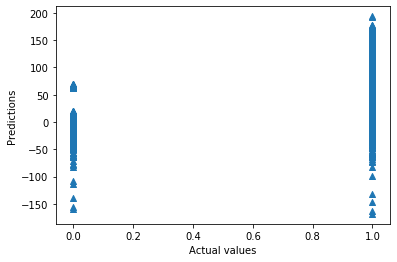

In [0]:
plt.scatter(y_test,linreg_pred1,marker='^')
plt.xlabel('Actual values')
plt.ylabel('Predictions')

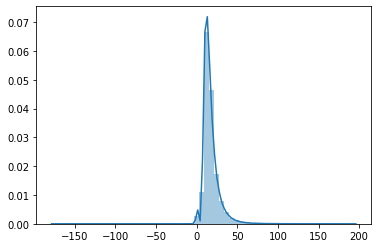

In [0]:
sns.distplot((y_test,linreg_pred1),bins=60)

# Gradient boosting Regressor

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

In [0]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
reg_pred = best_regressor.predict(X_test)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,reg_pred))
print('MSE:',metrics.mean_squared_error(y_test,reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,reg_pred)))

MAE: 5.831973569155243
MSE: 79.99356906583363
RMSE: 8.943912402625243


Text(0, 0.5, 'Predictions')

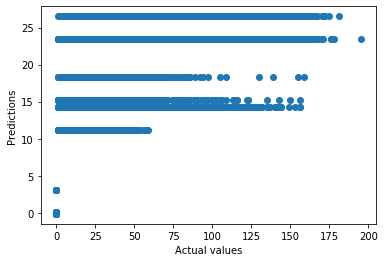

In [0]:
plt.scatter(y_test,reg_pred)
plt.xlabel('Actual values')
plt.ylabel('Predictions')

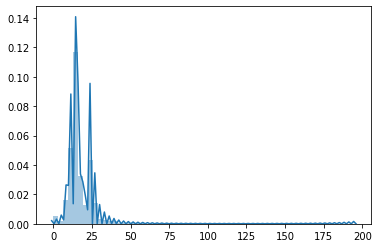

In [0]:
sns.distplot((y_test,reg_pred),bins=60)

# XGBoost Regressor

In [0]:
!pip install XGBOOST

In [0]:
import xgboost as xgb

In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [0]:
xg_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:36:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:20] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
preds = xg_reg.predict(X_test)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,preds))
print('MSE:',metrics.mean_squared_error(y_test,preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,preds)))

MAE: 6.538287751677239
MSE: 109.69629921142581
RMSE: 10.47360010748099


Text(0, 0.5, 'Predictions')

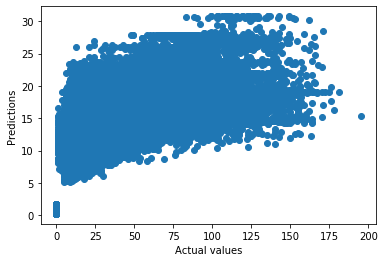

In [0]:
plt.scatter(y_test,preds)
plt.xlabel('Actual values')
plt.ylabel('Predictions')

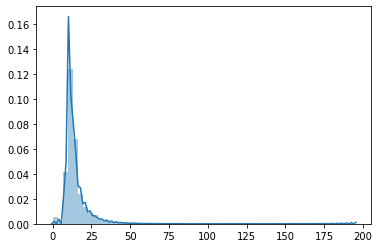

In [0]:
sns.distplot((y_test,preds),bins=60)

#Building Regression Models

In [0]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER_FL_NUM', 'ORIGIN_STATE_FIPS',
       'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_MARKET_ID',
       'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF', 'WHEELS_ON', 'TAXI_IN',
       'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DELAY_NEW', 'ARR_DEL15',
       'ARR_DELAY_GROUP', 'ARR_TIME_BLK', 'CANCELLED', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'DISTANCE_GROUP', 'DIV_AIRPORT_LANDINGS', 'incident_category',
       'zulu_time_value', 'wind_direction_value',
       'prevailing_visibility_value', 'cloud_coverage_value',
       'barometric_pressure_value', 'temp_dewpoint_value',
       'OP_UNIQUE_CARRIER_9E', 'OP_UNIQUE_CARRIER_AA', 'OP_UNIQUE_CARRIER_AS',
       'OP_UNIQUE_CARRIER_B6', 'OP_UNIQUE_CARRIER_DL', 'OP_UNIQUE_CARRIER_EV',
       'OP_UNIQUE_CARRIER_F9', 'OP_UNIQUE_CARRIER_G4', 'OP_UNIQUE_CARRIER_HA',
       'OP_UNIQUE_

In [0]:
X = df.drop(axis=1,columns=['TAXI_OUT','incident_category','ARR_TIME_BLK','DEP_TIME_BLK',])

In [0]:
y = df['TAXI_OUT']

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [0]:
lin_reg=linear_model.LinearRegression()

In [0]:
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
linreg_pred1 = lin_reg.predict(X_test)

In [0]:
from sklearn import metrics

#Adding Categorical Variables

In [0]:
X = df.drop(axis=1,columns=['TAXI_OUT','incident_category','ARR_TIME_BLK','DEP_TIME_BLK',])

In [0]:
y = df['TAXI_OUT']

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [0]:
lin_reg2=linear_model.LinearRegression()

In [0]:
lin_reg2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
linreg_pred2 = lin_reg2.predict(X_test)

In [0]:
from sklearn import metrics

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,linreg_pred2))
print('MSE:',metrics.mean_squared_error(y_test,linreg_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,linreg_pred2)))

MAE: 0.2800852655085925
MSE: 2.013717596549448
RMSE: 1.4190551774153983


Text(0, 0.5, 'Predictions')

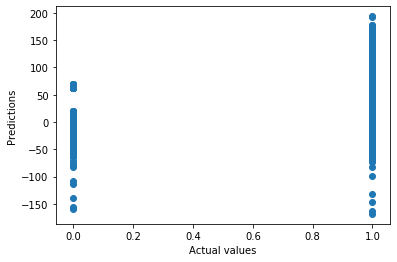

In [0]:
plt.scatter(y_test,linreg_pred2,marker)
plt.xlabel('Actual values')
plt.ylabel('Predictions')

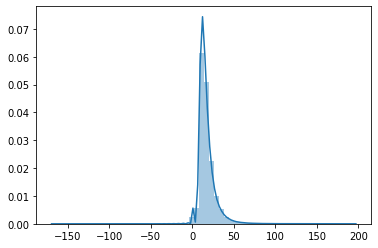

In [0]:
sns.distplot((y_test,linreg_pred2),bins=60)

#Gradient Boosting Regressor

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

In [0]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
reg_pred = best_regressor.predict(X_test)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,reg_pred))
print('MSE:',metrics.mean_squared_error(y_test,reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,reg_pred)))

MAE: 5.837721630950049
MSE: 80.54245673026466
RMSE: 8.974544931653341


Text(0, 0.5, 'Predictions')

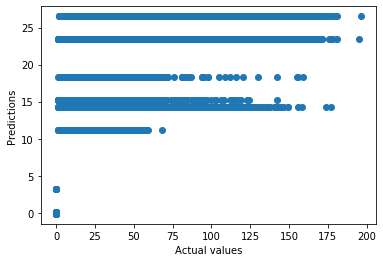

In [0]:
plt.scatter(y_test,reg_pred)
plt.xlabel('Actual values')
plt.ylabel('Predictions')

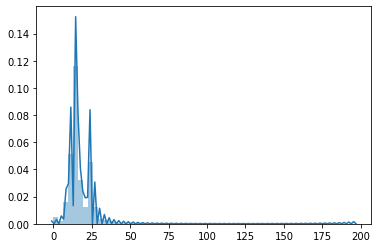

In [0]:
sns.distplot((y_test,reg_pred),bins=60)

In [0]:
from sklearn.ensemble import GradientBoostingRegressor

In [0]:
regressor2 = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0
)
regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
errors = [mean_squared_error(y_test, y_pred) for y_pred in regressor.staged_predict(X_test)]
best_n_estimators = np.argmin(errors)

In [0]:
best_regressor = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=best_n_estimators,
    learning_rate=1.0
)
best_regressor.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:
reg_pred2 = best_regressor.predict(X_test)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,reg_pred2))
print('MSE:',metrics.mean_squared_error(y_test,reg_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,reg_pred2)))

MAE: 5.837721630951267
MSE: 80.54245673028329
RMSE: 8.974544931654378


# Xgboost regressor

In [0]:
import xgboost as xgb

In [0]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [0]:
xg_reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[13:32:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:53] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=10,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [0]:
preds = xg_reg.predict(X_test)

In [0]:
print('MAE:', metrics.mean_absolute_error(y_test,preds))
print('MSE:',metrics.mean_squared_error(y_test,preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,preds)))

MAE: 6.539715592013715
MSE: 111.59693275796765
RMSE: 10.563944942963667


Text(0, 0.5, 'Predictions')

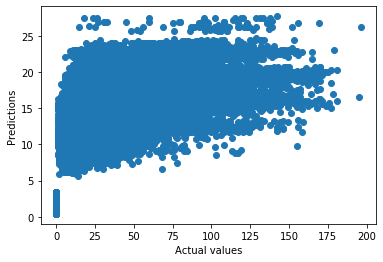

In [0]:
plt.scatter(y_test,preds)
plt.xlabel('Actual values')
plt.ylabel('Predictions')

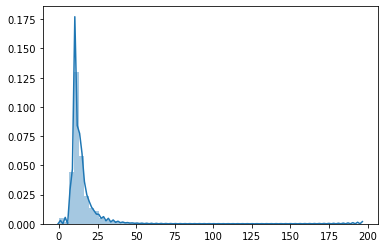

In [0]:
sns.distplot((y_test,preds),bins=60)